In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis

df = pd.read_csv(r"D:\SPE_cvs.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Columns: 126 entries, id to datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:height
dtypes: float64(113), int64(5), object(8)
memory usage: 8.0+ MB


In [2]:
keep =[0, 1, 2,15,16,17,19,
         110,111,115,119,121,122,124,
         46,47,51,55,57,58,60,
         94,95,99,103,105,106,108,
         30,31,35,39,41,42,44,
         62,63,67,71,73,74,76,
         78,79,83,87,89,90,92
         ]

df_mrs = df.iloc[:, keep]
df_mrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 49 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   id                                                                       8312 non-null   int64  
 1   area                                                                     8312 non-null   float64
 2   rt                                                                       8312 non-null   float64
 3   rt_range:min                                                             8312 non-null   float64
 4   rt_range:max                                                             8312 non-null   float64
 5   mz                                                                       8312 non-null   float64
 6   intensity_range:max                                                     

In [3]:
found_rt_diff = len(df_mrs)
diff = []
for i in range(found_rt_diff):
    number = df_mrs["rt_range:max"][i]- df_mrs["rt_range:min"][i]
    diff.append(number)
df_mrs["rt_difference"]=diff
df_mrs["rt_difference"].describe()

C:\Temp\ipykernel_3156\1848939665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mrs["rt_difference"]=diff


count    8312.000000
mean        0.739168
std         0.235270
min         0.097000
25%         0.600600
50%         0.706200
75%         0.791100
max         3.179900
Name: rt_difference, dtype: float64

In [4]:
rtmrs = df_mrs [(df_mrs["rt_difference"]<=1) & (df_mrs["rt"]<=20)]
rtmrs

,id,area,rt,rt_range:min,rt_range:max,mz,intensity_range:max,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:area,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:rt,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:fwhm,...,datafile:250224_ACNsiSPE_fr7_M5_try2_57_01_705.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_M5_try2_57_01_705.mzML:tailing_factor,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:area,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:rt,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:fwhm,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:mz,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:tailing_factor,rt_difference
0,1,1543.0,5.1540,5.0026,5.5071,316.92605,4643.0,NaN,NaN,NaN,...,1.1492,1.0746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5045
1,2,3949.0,5.1805,5.0026,5.7964,230.94458,9556.0,NaN,NaN,NaN,...,3.5243,2.1255,67.77,5.1222,0.1065,230.93566,1257.0,2.0152,1.5076,0.7938
2,3,402.6,5.1722,5.0035,5.3551,231.93376,1749.0,NaN,NaN,NaN,...,1.2188,1.1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3516
3,4,566.8,5.8071,5.5669,6.0275,355.95700,1729.0,NaN,NaN,NaN,...,1.9762,1.4881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4606
4,5,937.9,6.8400,6.6323,7.1085,226.92308,2800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,627.2,19.8507,19.5646,20.1851,464.19949,2626.0,225.20,19.7316,0.0964,...,1.3441,1.1720,263.50,20.0378,0.1152,464.16656,2482.0,2.9970,1.9985,0.6205
70,71,342.6,19.9410,19.5999,20.2093,465.98519,3093.0,342.60,20.0022,0.0865,...,0.3263,0.6632,36.72,20.1851,0.0490,466.10394,1498.0,0.9751,0.9875,0.6094
71,72,920.5,19.9898,19.5403,20.3370,726.19664,6031.0,920.50,19.9771,0.1833,...,0.6689,0.8345,401.50,19.9394,0.2588,725.87165,2574.0,3.4910,2.2455,0.7967
74,75,827.6,19.8672,19.6334,20.2197,660.46136,4620.0,271.80,19.6577,0.1067,...,1.0095,1.0048,475.40,19.7186,0.1047,660.66179,3695.0,1.6652,1.3326,0.5863


# 把 m/z四捨五入(因為是低解析,所以只看到小數點後一位), 得df_round_mrs

In [5]:
index_value_mrs = rtmrs.index


blank_mz_mrs = []
for a in index_value_mrs:
    float_mz_mrs = rtmrs["mz"].loc[a]
    int_mz_mrs = round(float_mz_mrs,1) #m/z:四捨五入到小數點第一位
    blank_mz_mrs.append(int_mz_mrs)
    

unround_mrt = rtmrs["rt"]

round_mrs={"rounded_mz":blank_mz_mrs,
           "rt":unround_mrt,
           "original index":index_value_mrs
}

df_round_mrs = pd.DataFrame(round_mrs)

print("OK")

OK


# 找出mrs有重複的值 ##df_mrsd是在df_round_mrs中有重複的mz的所有值的df

## to_drop:是我想drop掉有被重複的list ###kmrs,kps是已經剔掉重複值dataframe

In [28]:
grouped = df_round_mrs.groupby("rounded_mz")
df_mrsd = grouped.filter(lambda x: len(x) > 1)

In [29]:
groups = df_mrsd.groupby("rounded_mz")
for name, group in groups:
    if len(group) > 1:  # 找出有多筆資料的組
        print(f"Group for rounded_mz={name}:\n{group}") #看一下大概要如何設值

Group for rounded_mz=230.9:
   rounded_mz      rt  original index
1       230.9  5.1805               1
6       230.9  7.9083               6


In [30]:
to_drop = []  # 初始化需要刪除的索引
grouped = df_mrsd.groupby("rounded_mz")

for mzm, sub_df in grouped:
    sub_df = sub_df.reset_index()  # 重置索引，方便操作
    for i in range(len(sub_df)):    # 進行兩兩比較
        for j in range(i + 1, len(sub_df)):
            rt_diff = abs(sub_df.loc[i, "rt"] - sub_df.loc[j, "rt"])  # 計算 rt 差異
            if rt_diff <= 1.5:  # 若差異小於等於 1，認定為同一個 peak
                drop_idx = sub_df.loc[np.random.choice([i, j]), "index"]  # 隨機選擇一個索引
                to_drop.append(drop_idx)  # 加入刪除清單
print("ok")

ok


In [31]:
keep_m = df_round_mrs.drop(index=to_drop)
kpm = keep_m["original index"]
kmrs = df_mrs.iloc[kpm, :]
print("ok")

ok


# 保留會用到的column: cleannm,cleanp

In [32]:
kmrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 77
Data columns (total 50 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   id                                                                       73 non-null     int64  
 1   area                                                                     73 non-null     float64
 2   rt                                                                       73 non-null     float64
 3   rt_range:min                                                             73 non-null     float64
 4   rt_range:max                                                             73 non-null     float64
 5   mz                                                                       73 non-null     float64
 6   intensity_range:max                                                      73 non-n

In [63]:
keepexp =[0,1,2,3,4,5,6,  #id,rt,mz
          7,8,9,10,11,12,13,
          14,15,16,17,18,19,20,
          21,22,23,24,25,26,27
         ]
keepcon = [0,1,2,3,4,5,6,  #id,area,rt,mz
           28,29,30,31,32,33,34,
           35,36,37,38,39,40,41,
           42,43,44,45,46,47,48
         ]

cleanm = kmrs.iloc[:, keepcon]
cleanp = kmrs.iloc[:, keepexp]

In [64]:
cleanm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 77
Data columns (total 28 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   id                                                                       73 non-null     int64  
 1   area                                                                     73 non-null     float64
 2   rt                                                                       73 non-null     float64
 3   rt_range:min                                                             73 non-null     float64
 4   rt_range:max                                                             73 non-null     float64
 5   mz                                                                       73 non-null     float64
 6   intensity_range:max                                                      73 non-n

In [65]:
cols = cleanm.columns[[10,17,24]]  # 沒有mz我才刪掉
cleanm = cleanm.dropna(subset=cols, how="all")

cleanm.head(3) #這些就是BG有的訊號

,id,area,rt,rt_range:min,rt_range:max,mz,intensity_range:max,datafile:250224_ACNsiSPE_fr7_M6_try3_51_01_707.mzML:area,datafile:250224_ACNsiSPE_fr7_M6_try3_51_01_707.mzML:rt,datafile:250224_ACNsiSPE_fr7_M6_try3_51_01_707.mzML:fwhm,...,datafile:250224_ACNsiSPE_fr7_M5_try2_57_01_705.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_M5_try2_57_01_705.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_M5_try2_57_01_705.mzML:tailing_factor,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:area,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:rt,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:fwhm,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:mz,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:tailing_factor
0,1,1543.0,5.1540,5.0026,5.5071,316.92605,4643.0,426.6,5.1818,0.3043,...,2811.0,1.1492,1.0746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3949.0,5.1805,5.0026,5.7964,230.94458,9556.0,1026.0,5.1514,0.5458,...,8859.0,3.5243,2.1255,67.77,5.1222,0.1065,230.93566,1257.0,2.0152,1.5076
2,3,402.6,5.1722,5.0035,5.3551,231.93376,1749.0,NaN,NaN,NaN,...,1519.0,1.2188,1.1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 先用PCA看兩者之間是否有分布上的差異?

總total

In [30]:
pcac= [1,15, 16,17, 18, 20]
pcam= kmrs.iloc[:, pcac]
pcap= kps.iloc[:, pcac]
pcam["label"] = "Control: MRS"
pcap["label"] = "Experimental : PS128"
df = pd.concat([pcam, pcap],ignore_index=True) 
#做PCA是要用一個df所以要先把兩個df合併起來
#concat後的索引值一定要重新reset, 不然會重複跳出: cannot reindex on an axis with duplicate labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 1519 non-null   float64
 1   rt_range:min         1519 non-null   float64
 2   rt_range:max         1519 non-null   float64
 3   mz                   1519 non-null   float64
 4   intensity_range:min  1519 non-null   float64
 5   height               1519 non-null   float64
 6   label                1519 non-null   object 
dtypes: float64(6), object(1)
memory usage: 83.2+ KB


C:\Temp\ipykernel_18936\3824699753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcam["label"] = "Control: MRS"
C:\Temp\ipykernel_18936\3824699753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcap["label"] = "Experimental : PS128"


%檢查PCA在兩組為何都是擠在一坨的原因

# 還沒整理data前的PCA

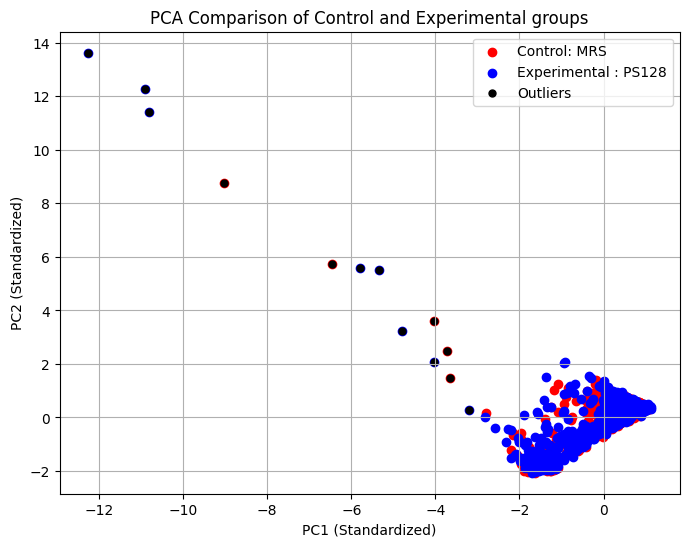

主成分解釋的方差比例： [0.40829987 0.27823758]


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis

X = df.drop(columns='label')
y = df['label']

scaler = StandardScaler()  # 標準化
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # 選擇主成分數
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])  # 整合 PCA 結果
df_pca['label'] = y

#將 PC1 和 PC2 再次標準化
X_pca_standardized = scaler.fit_transform(df_pca[['PC1', 'PC2']])
df_pca['PC1_standardized'] = X_pca_standardized[:, 0]
df_pca['PC2_standardized'] = X_pca_standardized[:, 1]


# 找出離群值
df_pca['distance_to_origin'] = np.sqrt(df_pca['PC1_standardized']**2 + df_pca['PC2_standardized']**2)
# 這裡使用歐幾里得距離,因為PCA已經被壓縮成二為了,故不用馬式距離
threshold = df_pca['distance_to_origin'].mean() + 2 * df_pca['distance_to_origin'].std()# 設定閾值（均值 + 2 * 標準差）
df_pca['outlier'] = df_pca['distance_to_origin'] > threshold # 標記異常點


plt.figure(figsize=(8, 6))
for label, color in zip(df_pca['label'].unique(), ['red', 'blue']):
    plt.scatter(df_pca[df_pca['label'] == label]['PC1_standardized'], 
                df_pca[df_pca['label'] == label]['PC2_standardized'], 
                label=label, color=color)
outliers = df_pca[df_pca['outlier']]
plt.scatter(outliers['PC1_standardized'], outliers['PC2_standardized'], 
            color='black', label='Outliers', s=25)
plt.title('PCA Comparison of Control and Experimental groups')
plt.xlabel('PC1 (Standardized)')
plt.ylabel('PC2 (Standardized)')
plt.legend()
plt.grid()
plt.show()
print("主成分解釋的方差比例：", pca.explained_variance_ratio_)

# 以下是先用兩組都有的column去做分析(因為如果要每個batch都獨立出來,會需要先補差值,更改column name會比較麻煩)

corrm= kmrs.iloc[:, pcac]
corrp= kps.iloc[:, pcac]
corrm["label"] = "1"
corrp["label"] = "2"
coo = pd.concat([corrm, corrp],ignore_index=True) #因為correlation限定數字,無法判斷str

corr = coo.corr()  # 計算相關係數
print(corr['label'].sort_values(ascending=False))  # 檢查哪些特徵相關

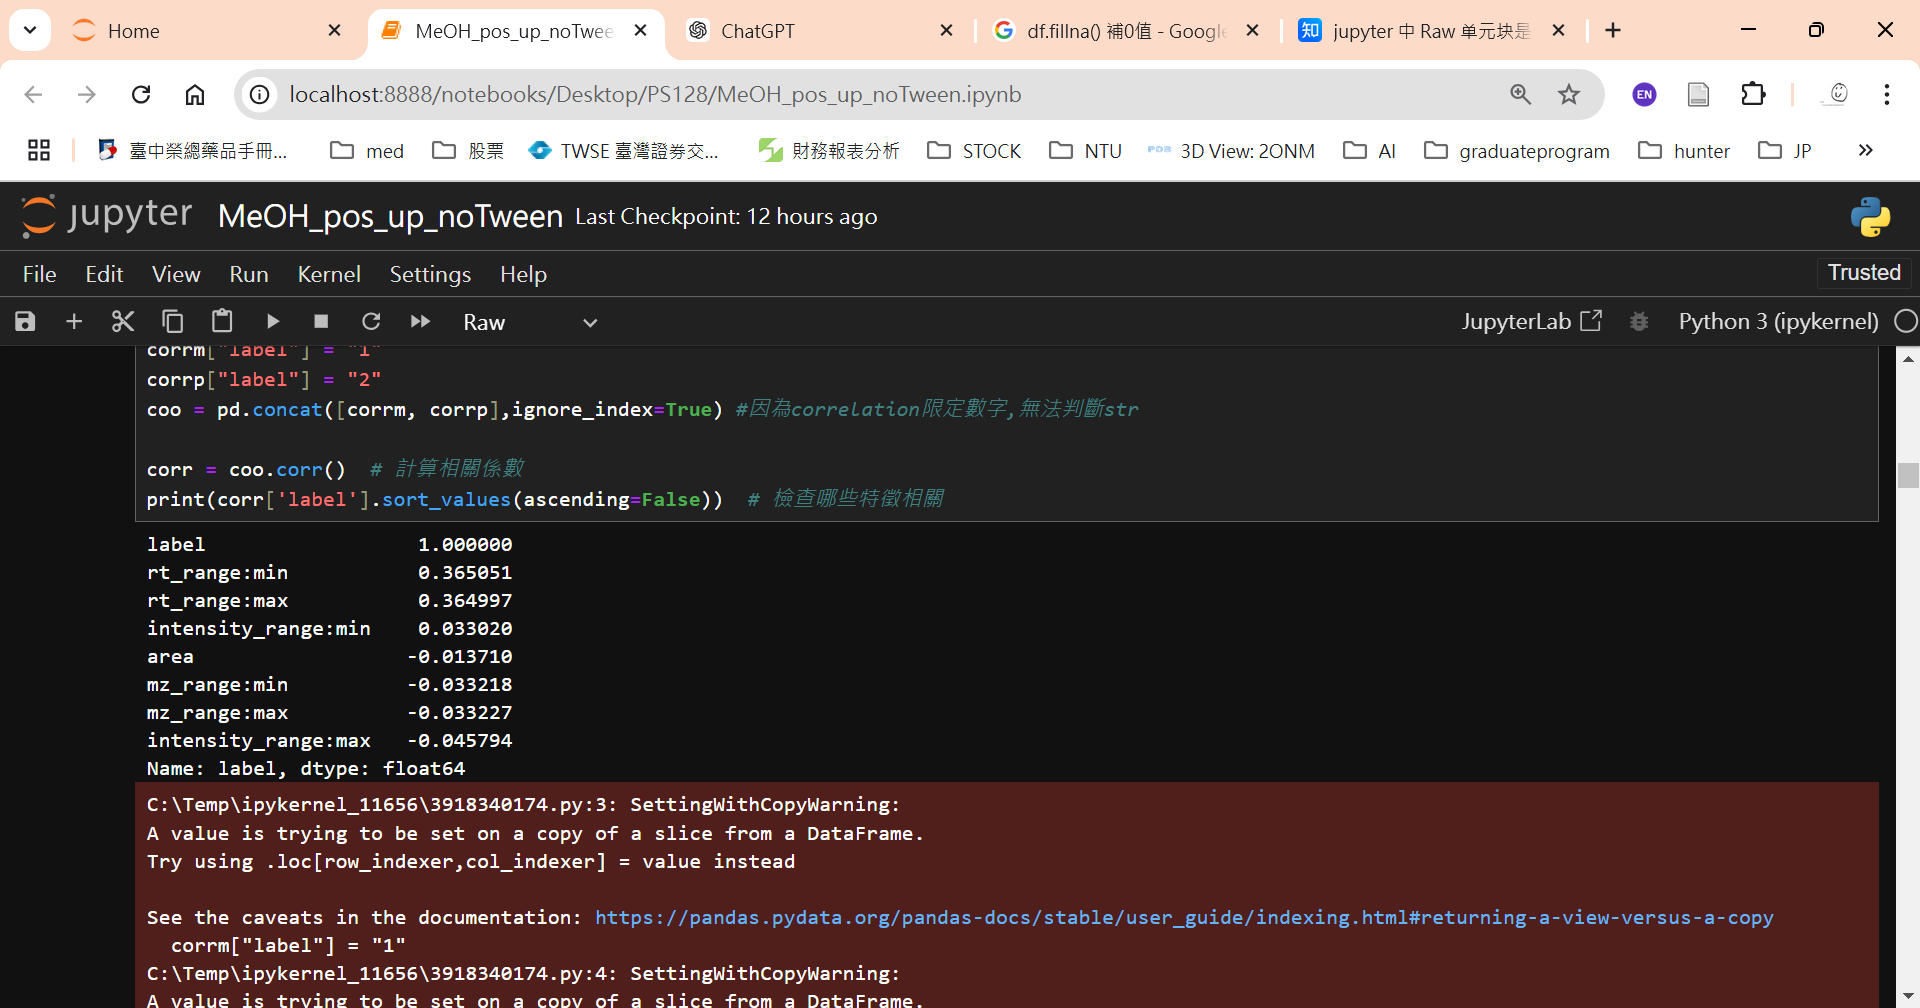
結果顯示關聯性很低

##結論:分開來一個batch一個batch比較PCA比較好---->結果改用每個batch去看反而能收納的資料筆數變少---->維持原本的用總total看

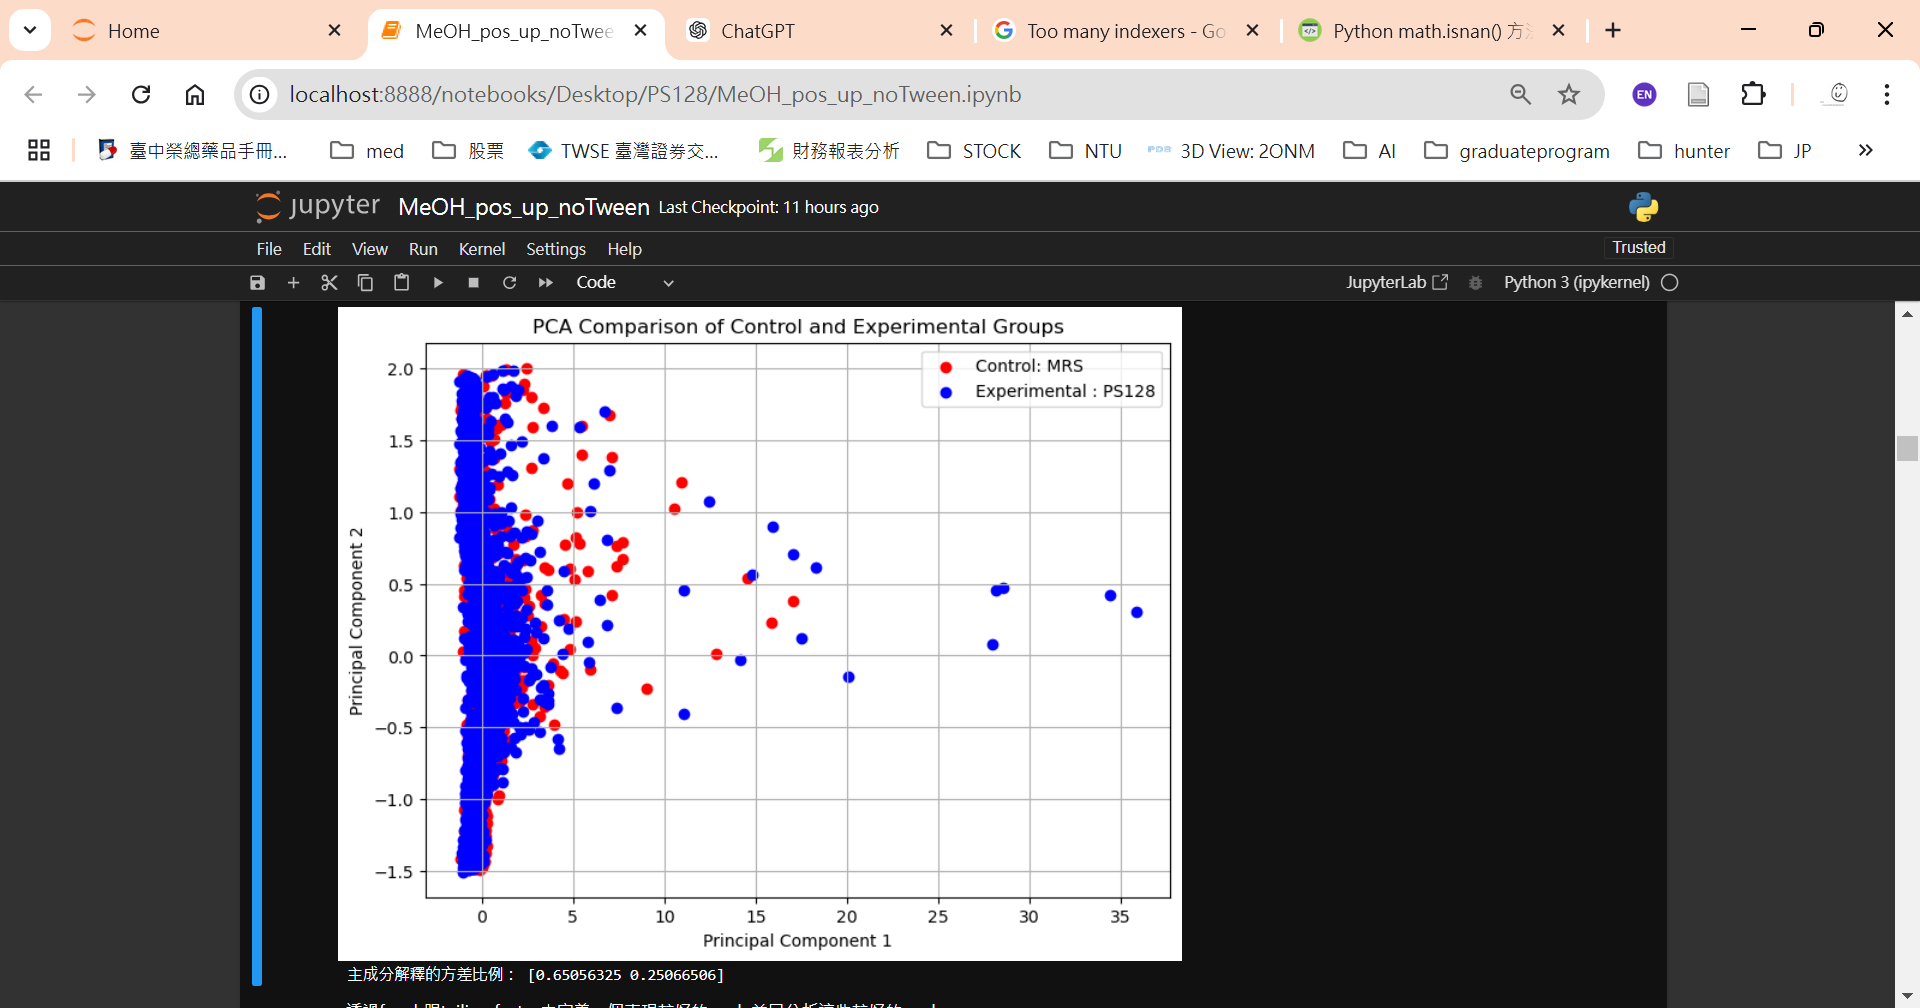

In [ ]:
第一次的圖(僅考慮area,mz,intensity max/min):
圖下方顯示主成分的變異解釋比例：[0.65, 0.25]。
PC1 解釋了 65% 的變異。
PC2 解釋了 25% 的變異。
---> 代表前兩個主成分能解釋大約 90% 的數據變異，適合用於視覺化

問題點 : 
1. 群組分離不明顯 --->代表這兩組樣本之間的差異可能並不顯著  ####解決方法:進一步的統計分析（例如 PERMANOVA）來檢驗群組間差異是否顯著。
2.PC1 的範圍比 PC2 大得多（例如橫軸 0 到 35，縱軸 -1.5 到 2）。這可能導致主成分之間的相對重要性被誤解。
可考慮將軸範圍標準化。

# 透過fwmh跟tailing factor去定義一個表現較好的peak,並只分析這些較好的peak

In [66]:
cleanp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 77
Data columns (total 28 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   id                                                                       73 non-null     int64  
 1   area                                                                     73 non-null     float64
 2   rt                                                                       73 non-null     float64
 3   rt_range:min                                                             73 non-null     float64
 4   rt_range:max                                                             73 non-null     float64
 5   mz                                                                       73 non-null     float64
 6   intensity_range:max                                                      73 non-n

In [67]:
cols_to_fill = [
    'datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:fwhm',
    'datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:tailing_factor',
    'datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:fwhm',
    'datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:tailing_factor',
    'datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:fwhm',
    'datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:tailing_factor'
]

goodps128 = cleanp.copy()
goodps128[cols_to_fill] = goodps128[cols_to_fill].fillna(value=100)

fwhm =[9,16,23]
tail=[13,20,27]
for fwhm_col, tail_col in zip(fwhm, tail):
    fwhmm = goodps128.iloc[:, fwhm_col]
    tailmm = goodps128.iloc[:, tail_col]
    for idx in range(len(goodps128)):
        if not (fwhmm.iloc[idx] <= 1 and tailmm.iloc[idx] <= 2.5):
            goodps128.iloc[idx, fwhm_col] = -1
            goodps128.iloc[idx, tail_col] = -1 # 只保留符合條件的，其它都設為 -1

goodps128.iloc[1]

id                                                                            2.00000
area                                                                       3949.00000
rt                                                                            5.18050
rt_range:min                                                                  5.00260
rt_range:max                                                                  5.79640
mz                                                                          230.94458
intensity_range:max                                                        9556.00000
datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:area                          NaN
datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:rt                            NaN
datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:fwhm                     -1.00000
datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:mz                            NaN
datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:in

In [68]:
fwhm_positive = (goodps128.iloc[:, fwhm] > 0).sum(axis=1)
tail_positive = (goodps128.iloc[:, tail] > 0).sum(axis=1)

goodps128_3 = goodps128[(fwhm_positive >= 2) & (tail_positive >= 2)]

goodps128_3  #這個方法比較接近手工上找到的

,id,area,rt,rt_range:min,rt_range:max,mz,intensity_range:max,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:area,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:rt,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:fwhm,...,datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:tailing_factor,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:area,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:rt,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:fwhm,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:mz,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:tailing_factor
1,2,3949.0,5.1805,5.0026,5.7964,230.94458,9556.0,NaN,NaN,-1.0000,...,8312.0,20.8499,2.2955,3949.0,5.2542,0.5082,230.94722,9556.0,1.2475,1.1237
2,3,402.6,5.1722,5.0035,5.3551,231.93376,1749.0,NaN,NaN,-1.0000,...,1749.0,1.5193,1.2596,337.0,5.1982,0.3903,231.94519,1464.0,0.4341,0.7171
3,4,566.8,5.8071,5.5669,6.0275,355.95700,1729.0,NaN,NaN,-1.0000,...,1729.0,1.1394,1.0697,539.1,5.7387,0.6368,355.96709,1616.0,1.1783,1.0891
4,5,937.9,6.8400,6.6323,7.1085,226.92308,2800.0,NaN,NaN,-1.0000,...,2387.0,0.6717,0.8358,937.9,6.8015,0.4126,226.92963,2800.0,2.2175,1.6088
5,6,3247.0,6.8814,6.5775,7.2817,242.96663,9514.0,NaN,NaN,-1.0000,...,9514.0,1.0158,1.0079,2222.0,6.8568,0.3802,242.96325,5973.0,1.8217,1.2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,627.2,19.8507,19.5646,20.1851,464.19949,2626.0,225.20,19.7316,-1.0000,...,1705.0,2.0383,1.5192,627.2,19.8953,0.4414,464.10958,1947.0,0.4151,0.7075
70,71,342.6,19.9410,19.5999,20.2093,465.98519,3093.0,342.60,20.0022,0.0865,...,2004.0,0.9907,0.9953,103.8,19.6491,0.0625,466.03264,1928.0,0.9997,0.9999
71,72,920.5,19.9898,19.5403,20.3370,726.19664,6031.0,920.50,19.9771,0.1833,...,3890.0,3.0269,2.0134,620.9,20.2632,0.1576,726.27192,6031.0,1.5243,1.2622
74,75,827.6,19.8672,19.6334,20.2197,660.46136,4620.0,271.80,19.6577,0.1067,...,4620.0,3.9829,2.4914,413.7,20.0179,0.1284,660.28550,3990.0,2.0085,1.5043


In [129]:
merged = goodps128_3.merge(cleanm, how='cross', suffixes=('_ps', '_clean')) #用笛卡兒積（cross join）

matched = merged[
    (abs(merged["mz_ps"] - merged["mz_clean"]) <= 0.5) &
    (abs(merged["rt_ps"] - merged["rt_clean"]) <= 1)
]


to_drop_idx = matched["id_ps"].unique() if "id_ps" in matched.columns else matched.index.get_level_values(0).unique()
goodps128_1 = goodps128_3[~goodps128_3['id'].isin(to_drop_idx)]

goodps128_1

,id,area,rt,rt_range:min,rt_range:max,mz,intensity_range:max,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:area,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:rt,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:fwhm,...,datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_P6_try3_52_01_708.mzML:tailing_factor,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:area,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:rt,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:fwhm,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:mz,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_P5_try2_58_01_706.mzML:tailing_factor
4,5,937.9,6.8400,6.6323,7.1085,226.92308,2800.0,NaN,NaN,-1.0,...,2387.0,0.6717,0.8358,937.90,6.8015,0.4126,226.92963,2800.0,2.2175,1.6088
5,6,3247.0,6.8814,6.5775,7.2817,242.96663,9514.0,NaN,NaN,-1.0,...,9514.0,1.0158,1.0079,2222.00,6.8568,0.3802,242.96325,5973.0,1.8217,1.2606
7,8,2313.0,7.9779,7.7327,8.2961,276.95228,5431.0,NaN,NaN,-1.0,...,5431.0,1.5245,1.2622,1460.00,7.9999,0.4081,276.94294,4275.0,1.1555,1.0778
10,11,1075.0,11.9718,11.7430,12.3670,398.04076,2667.0,NaN,NaN,-1.0,...,2667.0,1.6309,1.3155,1075.00,11.9798,0.4944,398.04739,2657.0,1.7604,1.3802
11,12,540.7,14.6575,14.4395,14.8371,378.04917,1763.0,NaN,NaN,-1.0,...,1763.0,0.6685,0.8343,65.82,14.6373,0.1118,378.03043,1342.0,1.9872,1.4936
12,13,675.1,16.7219,16.4629,16.9545,412.08746,3036.0,NaN,NaN,-1.0,...,3036.0,1.1583,1.0791,466.60,16.8282,0.3519,412.10308,2549.0,0.9998,0.9999


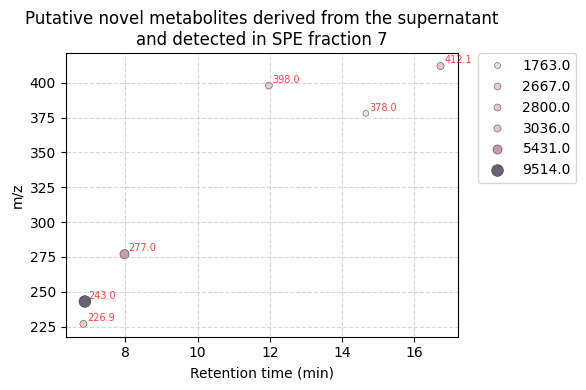

In [87]:
plt.figure(figsize=(6, 4))  # 調整整體圖的大小

sns.scatterplot(
    data=goodps128_1,
    x="rt",
    y="mz",
    hue="intensity_range:max",
    size="intensity_range:max",
    edgecolor='k',
    alpha=0.7
)

# 加上 m/z 標籤
top_peaks = goodps128_1.sort_values(by="intensity_range:max", ascending=False).head(10)
for _, row in top_peaks.iterrows():
    plt.text(
        row["rt"] + 0.1,
        row["mz"] + 2,
        f"{row['mz']:.1f}",
        fontsize=7,
        alpha=0.75,
        color="red"
    )

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Retention time (min)")
plt.ylabel("m/z")
plt.title("Putative novel metabolites derived from the supernatant\nand detected in SPE fraction 7")

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0,
)

plt.tight_layout()
plt.show()

In [151]:
ps_col = [11, 18, 25]
mrs_col  = [39, 46, 53]
numbers = len(matched)

mrs_blk = []
ps_blk = []

for i in range(numbers):
    ps_intensity = matched.iloc[i, ps_col].mean()
    mrs_intensity = matched.iloc[i, mrs_col].mean()
    ps_blk.append(ps_intensity)
    mrs_blk.append(mrs_intensity)

matched["ps mean"] = ps_blk
matched["mrs mean"] = mrs_blk

intensity_ratio = matched["ps mean"] / matched["mrs mean"]
matched["ratio"] = intensity_ratio

matched["Type"] = np.where(
    matched["ratio"] < 1, 0, 
    np.where(matched["ratio"] > 1, 1, "No Change")
)

matched

C:\Temp\ipykernel_2328\2339451041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["ps mean"] = ps_blk
C:\Temp\ipykernel_2328\2339451041.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["mrs mean"] = mrs_blk
C:\Temp\ipykernel_2328\2339451041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,id_ps,area_ps,rt_ps,rt_range:min_ps,rt_range:max_ps,mz_ps,intensity_range:max_ps,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:area,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:rt,datafile:250224_ACNsiSPE_fr7_P5_try1_60_01_704.mzML:fwhm,...,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:mz,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:asymmetry_factor,datafile:250224_ACNsiSPE_fr7_M5_try1_59_01_703.mzML:tailing_factor,ps mean,mrs mean,ratio,Type,size_group,Type_cat
1,2,3949.0,5.1805,5.0026,5.7964,230.94458,9556.0,NaN,NaN,-1.0000,...,230.93566,1257.0,2.0152,1.5076,8934.000000,4232.666667,2.110726,1,60,Derived
67,3,402.6,5.1722,5.0035,5.3551,231.93376,1749.0,NaN,NaN,-1.0000,...,NaN,NaN,NaN,NaN,1606.500000,1519.000000,1.057604,1,60,Derived
133,4,566.8,5.8071,5.5669,6.0275,355.95700,1729.0,NaN,NaN,-1.0000,...,NaN,NaN,NaN,NaN,1672.500000,1227.000000,1.363081,1,60,Derived
394,9,4032.0,8.9559,8.7217,9.2815,453.21985,9870.0,NaN,NaN,-1.0000,...,NaN,NaN,NaN,NaN,9276.500000,1282.000000,7.235959,1,60,Derived
655,14,4376.0,18.5709,18.0008,18.7817,525.13291,9739.0,389.90,18.6946,0.3168,...,525.09249,2639.0,0.9644,0.9822,7512.666667,3438.000000,2.185185,1,60,Derived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,69,627.2,19.8507,19.5646,20.1851,464.19949,2626.0,225.20,19.7316,-1.0000,...,464.16656,2482.0,2.9970,1.9985,2005.666667,2316.333333,0.865880,0,40,Utilized
4286,71,342.6,19.9410,19.5999,20.2093,465.98519,3093.0,342.60,20.0022,0.0865,...,466.10394,1498.0,0.9751,0.9875,2341.666667,1975.666667,1.185254,1,60,Derived
4352,72,920.5,19.9898,19.5403,20.3370,726.19664,6031.0,920.50,19.9771,0.1833,...,725.87165,2574.0,3.4910,2.2455,4765.000000,4068.333333,1.171241,1,60,Derived
4418,75,827.6,19.8672,19.6334,20.2197,660.46136,4620.0,271.80,19.6577,0.1067,...,660.66179,3695.0,1.6652,1.3326,3933.333333,3815.000000,1.031018,1,60,Derived


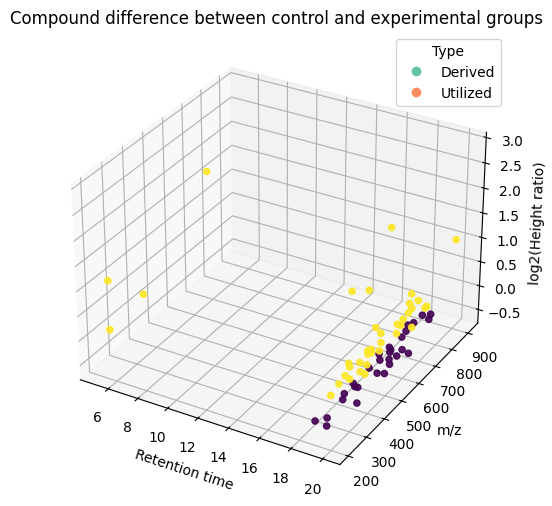

In [164]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

x = matched["rt_ps"]
y = matched["mz_ps"]
z = np.log2(matched["ratio"])

colors = matched["Type"].astype(int)  

#cmap = plt.cm.Set2  

sc = ax.scatter(x, y, z, c=colors, alpha=0.9)

legend_labels = ["Derived", "Utilized"]
handles = [
    plt.Line2D([0], [0], marker='o', linestyle='', color=cmap(0), label=legend_labels[0]),
    plt.Line2D([0], [0], marker='o', linestyle='', color=cmap(1), label=legend_labels[1])
]
ax.legend(handles=handles, title="Type")

ax.set_xlabel("Retention time")
ax.set_ylabel("m/z")
ax.set_zlabel("log2(Height ratio)")
ax.set_title("Compound difference between control and experimental groups")

plt.show()

# 暫且用不到

In [35]:
m1.loc[:, "data number"] = cleanm.apply(lambda _: '', axis=1) #增加空的一行因為下個cell要插data進去
fwhmmneg = m1.iloc[:, fwhm]  
fwhmmneg.tail(3)

,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:fwhm,datafile:250224_ACNsiSPE_fr5_M5_try2_13_01_672.mzML:fwhm,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:fwhm
1156,-1.0000,0.2146,0.2533
1159,0.2049,0.1590,0.4412
1160,0.7333,0.2994,0.1306


In [36]:
blk = []  
bb= fwhmmneg.index
for rowid in bb:  
    gg = fwhmmneg.loc[rowid]  
    blk.clear()  # 每行檢查前清空 blk，確保每行有自己的 list

    for colid in range(len(fwhm)):  # 遍歷每列
        if gg.iloc[colid] >= 0:  # 如果該格的數值 >= 0
            blk.append(1)  # 將有效的資料加到 blk list 中

    data_num = len(blk)  # blk list 的長度即為該行有效資料的數量
    m1.loc[rowid, "data number"] = data_num  # 更新 cleanp 中該行的 "data number" 欄位

m1.head(3)

,id,area,rt,mz,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:area,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:rt,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:fwhm,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:intensity_range:min,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr5_M5_try1_11_01_670.mzML:tailing_factor,...,datafile:250224_ACNsiSPE_fr5_M5_try2_13_01_672.mzML:intensity_range:min,datafile:250224_ACNsiSPE_fr5_M5_try2_13_01_672.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr5_M5_try2_13_01_672.mzML:tailing_factor,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:area,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:rt,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:fwhm,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:intensity_range:min,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:intensity_range:max,datafile:250224_ACNsiSPE_fr5_M6_try3_15_01_674.mzML:tailing_factor,data number
0,4,143.8,5.3794,640.17404,143.8,5.1813,0.8460,830.6,1668.0,0.6633,...,1184.0,1516.0,0.9999,74.28,5.5531,-1.0000,1003.0,1351.0,1.4868,2
5,10,6124.0,5.2911,638.33832,6124.0,5.2576,-1.0000,2293.0,4318.0,3.7164,...,1756.0,3520.0,0.6939,573.80,5.1347,0.1686,1981.0,2447.0,1.2389,2
7,13,1553.0,5.4565,609.05595,1553.0,5.3349,0.5408,910.5,3806.0,1.0017,...,708.1,2420.0,1.3321,1413.00,5.6571,0.6702,724.2,2412.0,0.9991,2


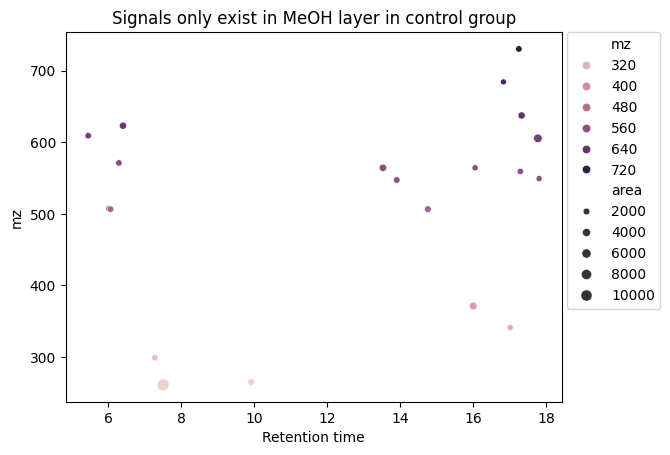

In [30]:
sns.scatterplot(
    x="rt", 
    y="mz",
    hue="mz",
    size="area", 
    data= result
)

plt.plot(color="gray", 
         alpha = 0.5,
         linestyle="--", 
         linewidth=2)
plt.xlabel("Retention time")
plt.ylabel("mz")
plt.title("Signals only exist in MeOH layer in control group")
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)
plt.show()

# m2,p2以前的index都是original

# 多維的df: m3/d3(fwhm-1)  ***禁用:m3,d3鑒於mutiindex的要求,所以index已reset

In [35]:
batch_columns  = { #先用dictionary的分是去定義一個dataframe,之後再用mutiindex去做子分類
    "Try1": m2.iloc[:,4:10], #這裡的column name要轉成tuple不然會以index的方式呈現,然後系統就gg(我後來改了所以這個注釋不重要)
    "Try2": m2.iloc[:,10:16],  #info 先不要加,不然會亂掉
    "Try3": m2.iloc[:,16:22],
}

m3 = pd.concat(batch_columns, axis=1)# 按列合併
m3.columns = pd.MultiIndex.from_tuples(
    [(batch, col) for batch, cols in batch_columns.items() for col in cols.columns]
)

print("ok")

ok


修改第二層的名稱之後後做起來會比較方便

In [36]:
 #不能直接用暴力寫法...因為每一個index都要是唯一的...
nn = len(m3.columns)
level_0 = ["Batch1", "Batch2", "Batch3", "Batch4", "Batch5"]
level_1 = [f"Metric{i}" for i in range(nn)] #共30個 (因為他們目前的取名會是不一樣的)--->來自batch5*每個子集6=30個metrics
index = pd.MultiIndex.from_product([level_0, level_1], names=["Batch", "Metric"]) #先做一個df,代表[batch3,1],[batch3,2]....依此類推

base_level_1 = ["area", "RT", "fwhm", "mz", "max intensity", "tailing factor"]# 新的 level=1 名稱

unique_level_1 = []
for batch in level_0:
    unique_level_1.extend(base_level_1)
    #base_level_1(7) *5(level_0)
    #len(level_1) // len(base_level_1)：計算基礎名稱需要重複的次數
    #要用extend -->[0, 1, 2, 3, 4, 0, 1] =[1,2,3,4] extend [0,1]
    #不能用append  --->[0, 1, 2, 3, 4, [0, 1]] =[1,2,3,4] append [0,1]

new_columns = pd.MultiIndex.from_tuples(
    [(batch, metric) for batch, metric in zip(m3.columns.levels[0].repeat(len(base_level_1)), unique_level_1)],
    names=m3.columns.names
)                                        #用 base_level_1 * repeats 就會生成而不會牴觸

m3.columns = new_columns
m3["original_index"] = m2.index
m3.head(3)

Try1                                                       Try2          \
     area      RT    fwhm     mz max intensity tailing factor   area      RT   
3   421.4  5.2576  0.5092  769.7        1919.0         1.8439  210.4  5.4037   
7  1553.0  5.3349  0.5408  910.5        3806.0         1.0017  999.5  5.3775   
8   434.3  6.3066  0.1813  928.4        2096.0         1.2554  950.2  6.3595   

                                                  Try3                  \
     fwhm      mz max intensity tailing factor    area      RT    fwhm   
3  0.1907  1080.0        1705.0         0.6992   137.8  5.4750  0.8787   
7  1.1975   708.1        2420.0         1.3321  1413.0  5.6571  0.6702   
8  0.3871   726.6        2181.0         0.7693   385.4  6.3294  0.5566   

                                       original_index  
       mz max intensity tailing factor                 
3  1152.0        1504.0         1.2546              3  
7   724.2        2412.0         0.9991              7  
8   768.2        1712.0         0.6252              8

# 因為想把沒有意義的fwhm在分析得時不要被分析到,所以目標是把原本的負值改為nan;所得: filterded_p3; filtered_m3

In [156]:
def filter_batches(df, column_to_check, threshold=0): #自訂函數
    #filter_batches:是一種篩選批次的函數, ###目標::能夠對每個 batch 的 fwhm 列進行逐一篩選
    #column_to_check：指定要檢查的column名稱
    #threshold=0：這是篩選條件的閾值(有需要記得自己改這個數值)，意思是我們要檢查每個 batch 中的 fwhm 值是否>=0
    for batch in df.columns.levels[0]:  
        fwhm_col = (batch, column_to_check)  # fwhm_col =batch+ fwhm
        if fwhm_col in df.columns:  
            valid_rows = df[fwhm_col] >= threshold  
            df.loc[~valid_rows, (batch, slice(None))] = np.nan # 對該批次的所有列，僅保留符合條件的行
    return df
filtered_m3 = filter_batches(m3, "fwhm" , threshold=0)
filtered_p3 = filter_batches(p3, "fwhm" , threshold=0)
print("ok")

ok


# PS128

In [39]:
batch_columns  = {                          
    "Try1": p2.iloc[:,4:10], #這裡的column name要轉成tuple不然會以index的方式呈現,然後系統就gg(我後來改了所以這個注釋不重要)
    "Try2": p2.iloc[:,10:16],  #info 先不要加,不然會亂掉
    "Try3": p2.iloc[:,16:22]
}

p3 = pd.concat(batch_columns, axis=1)  # 按列合併
p3.columns = pd.MultiIndex.from_tuples(
    [(batch, col) for batch, cols in batch_columns.items() for col in cols.columns]
)
p3.head(3)

Try1  \
   datafile:250224_ACNsiSPE_fr5_P5_try2_14_01_673.mzML:area   
3                                               102.5         
6                                               587.2         
10                                              241.3         

                                                           \
   datafile:250224_ACNsiSPE_fr5_P5_try2_14_01_673.mzML:rt   
3                                              5.2858       
6                                              5.3895       
10                                             5.3895       

                                                             \
   datafile:250224_ACNsiSPE_fr5_P5_try2_14_01_673.mzML:fwhm   
3                                              0.2290         
6                                              0.5356         
10                                             0.7991         

                                                                            \
   datafile:250224_ACNsiSPE_fr5_P5_try2_14_01_673.mzML:intensity_range:min   
3                                              1189.0                        
6                                              1042.0                        
10                                              751.3                        

                                                                            \
   datafile:250224_ACNsiSPE_fr5_P5_try2_14_01_673.mzML:intensity_range:max   
3                                              1492.0                        
6                                              2138.0                        
10                                             1515.0                        

                                                                       \
   datafile:250224_ACNsiSPE_fr5_P5_try2_14_01_673.mzML:tailing_factor   
3                                              1.9719                   
6                                              1.7502                   
10                                             0.6983                   

                                                       Try2  \
   datafile:250224_ACNsiSPE_fr5_P5_try1_12_01_671.mzML:area   
3                                               320.0         
6                                               690.6         
10                                              252.1         

                                                           \
   datafile:250224_ACNsiSPE_fr5_P5_try1_12_01_671.mzML:rt   
3                                              5.1709       
6                                              5.3266       
10                                             5.3266       

                                                             \
   datafile:250224_ACNsiSPE_fr5_P5_try1_12_01_671.mzML:fwhm   
3                                              0.2682         
6                                              0.4142         
10                                             0.4098         

                                                                            \
   datafile:250224_ACNsiSPE_fr5_P5_try1_12_01_671.mzML:intensity_range:min   
3                                               664.7                        
6                                               867.2                        
10                                              805.9                        

                                                                            \
   datafile:250224_ACNsiSPE_fr5_P5_try1_12_01_671.mzML:intensity_range:max   
3                                              1852.0                        
6                                              2173.0                        
10                                             1718.0                        

                                                                       \
   datafile:250224_ACNsiSPE_fr5_P5_try1_12_01_671.mzML:tailing_factor   
3                                              0.7481                   
6                             

In [36]:
mm = len(p3.columns)
level_0 = ["Batch1", "Batch2", "Batch3", "Batch4", "Batch5"]
level_1 = [f"Metric{i}" for i in range(mm)] 
index = pd.MultiIndex.from_product([level_0, level_1], names=["Batch", "Metric"]) 
base_level_1 = ["area", "RT", "fwhm", "mz", "max intensity", "tailing factor"]#注意順序,擺錯會很麻煩

unique_level_2 = []
for batch in level_0:
    unique_level_2.extend(base_level_1)

new_columns = pd.MultiIndex.from_tuples(
    [(batch, metric) for batch, metric in zip(p3.columns.levels[0].repeat(len(base_level_1)), unique_level_2)],
    names=p3.columns.names
)                                        #用 base_level_1 * repeats 就會生成而不會牴觸

p3.columns = new_columns
p3["original_index"] = p2.index
p3.head(3)

batch3                                                           batch4  \
      area      RT    fwhm         mz max intensity tailing factor     area   
10  888.10  6.1290  0.2708  415.17276        3337.0         0.5413   9378.0   
11   54.83  6.1290 -1.0000  459.19326        1281.0         0.9897  10350.0   
12  250.80  6.3069  0.1525  476.23707        2156.0         0.5000   5996.0   

                               ...     batch6                               \
        RT    fwhm         mz  ...         mz max intensity tailing factor   
10  5.7731  0.5515  415.19678  ...  415.18295        1337.0         0.5450   
11  5.9353  0.5909  459.22414  ...  459.21456        1124.0         2.4924   
12  5.9353  0.5544  476.26442  ...   -1.00000          -1.0        -1.0000   

   batch7                                                      original_index  
     area     RT    fwhm       mz max intensity tailing factor                 
10  302.6  6.172  0.2026  415.192        2001.0            0.5             10  
11   -1.0 -1.000 -1.0000   -1.000          -1.0           -1.0             11  
12   -1.0 -1.000 -1.0000   -1.000          -1.0           -1.0             12  

[3 rows x 31 columns]

# 看PCA中實驗組跟對照組之間的差異

# df1的index有改!!!!! d4才是沒有改的!!!!

In [22]:
pcam1 = m2.iloc[:,3:4]
run1 = pcam1.index
pcam1["rt_range:min"] = df_mrs["rt_range:min"][run1]
pcam1["rt_range:max"] = df_mrs["rt_range:max"][run1]
pcam1["intensity_range:min"] = df_mrs["intensity_range:min"][run1]
pcam1["intensity_range:max"] = df_mrs["intensity_range:min"][run1]
pcam1["index"] = run1

pcap1 = p2.iloc[:,3:4]
run2 =  pcap1.index
pcap1["rt_range:min"] = df_ps128["rt_range:min"][run2]
pcap1["rt_range:max"] = df_ps128["rt_range:max"][run2]
pcap1["intensity_range:min"] = df_ps128["intensity_range:min"][run2]
pcap1["intensity_range:max"] = df_ps128["intensity_range:max"][run2]
pcap1["index"] = run2

pcam1["label"] = "Control: MRS"
pcap1["label"] = "Experimental: PS128"

df1 = pd.concat([pcam1,pcap1],ignore_index=True) 
#做PCA是要用一個df所以要先把兩個df合併起來
#concat後的索引值一定要重新reset, 不然會重複跳出: cannot reindex on an axis with duplicate labels
#df4 = pd.concat([pcam1,pcap1])
print("ok")

ok


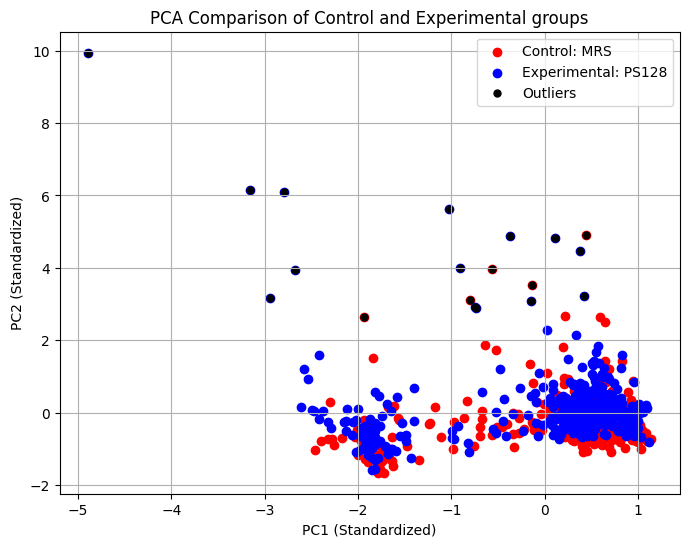

主成分解釋的方差比例： [0.44083308 0.20395066]


In [23]:
X = df1.drop(columns=["label","index"])
y = df1["label"]

scaler = StandardScaler()  # 標準化
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # 選擇主成分數
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])  # 整合 PCA 結果
df_pca['label'] = y

X_pca_standardized = scaler.fit_transform(df_pca[['PC1', 'PC2']])
df_pca['PC1_standardized'] = X_pca_standardized[:, 0]
df_pca['PC2_standardized'] = X_pca_standardized[:, 1]

df_pca['distance_to_origin'] = np.sqrt(df_pca['PC1_standardized']**2 + df_pca['PC2_standardized']**2)
threshold = df_pca['distance_to_origin'].mean() + 2 * df_pca['distance_to_origin'].std()
df_pca['outlier'] = df_pca['distance_to_origin'] > threshold 

plt.figure(figsize=(8, 6))
for label, color in zip(df_pca['label'].unique(), ['red', 'blue']):
    plt.scatter(df_pca[df_pca['label'] == label]['PC1_standardized'], 
                df_pca[df_pca['label'] == label]['PC2_standardized'], 
                label=label, color=color)
outliers = df_pca[df_pca['outlier']]
plt.scatter(outliers['PC1_standardized'], outliers['PC2_standardized'], 
            color='black', label='Outliers', s=25)

plt.title('PCA Comparison of Control and Experimental groups')
plt.xlabel('PC1 (Standardized)')
plt.ylabel('PC2 (Standardized)')
plt.legend()
plt.grid()
plt.show()

print("主成分解釋的方差比例：", pca.explained_variance_ratio_)

In [38]:
df2 =df1[df1["rt_range:max"]<=24.5]
df3 = df2.reset_index()
df3.head()

,level_0,mz,rt_range:min,rt_range:max,intensity_range:min,intensity_range:max,index,label
0,0,377.07277,12.7778,13.5392,756.3,756.3,1,Control: MRS
1,1,372.14433,13.3509,14.1272,1013.0,1013.0,3,Control: MRS
2,2,371.14794,13.3510,14.2219,4075.0,4075.0,4,Control: MRS
3,3,393.12968,13.5273,14.2525,1055.0,1055.0,5,Control: MRS
4,4,415.19436,13.7770,14.8883,4469.0,4469.0,6,Control: MRS


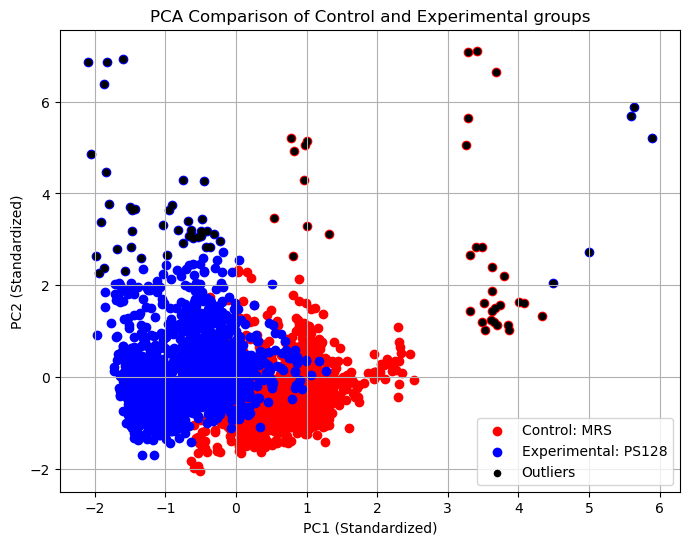

主成分解釋的方差比例： [0.49656136 0.22098894]


In [39]:
X = df3.drop(columns=["label","index"])
y = df3["label"]

scaler = StandardScaler()  # 標準化
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # 選擇主成分數
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])  # 整合 PCA 結果
df_pca['label'] = y

X_pca_standardized = scaler.fit_transform(df_pca[['PC1', 'PC2']])
df_pca['PC1_standardized'] = X_pca_standardized[:, 0]
df_pca['PC2_standardized'] = X_pca_standardized[:, 1]

df_pca['distance_to_origin'] = np.sqrt(df_pca['PC1_standardized']**2 + df_pca['PC2_standardized']**2)
threshold = df_pca['distance_to_origin'].mean() + 2 * df_pca['distance_to_origin'].std()
df_pca['outlier'] = df_pca['distance_to_origin'] > threshold 

plt.figure(figsize=(8, 6))
for label, color in zip(df_pca['label'].unique(), ['red', 'blue']):
    plt.scatter(df_pca[df_pca['label'] == label]['PC1_standardized'], 
                df_pca[df_pca['label'] == label]['PC2_standardized'], 
                label=label, color=color)
outliers = df_pca[df_pca['outlier']]
plt.scatter(outliers['PC1_standardized'], outliers['PC2_standardized'], 
            color='black', label='Outliers', s=20)

plt.title('PCA Comparison of Control and Experimental groups')
plt.xlabel('PC1 (Standardized)')
plt.ylabel('PC2 (Standardized)')
plt.legend()
plt.grid()
plt.show()

print("主成分解釋的方差比例：", pca.explained_variance_ratio_)

#### df2(加data_number,餵進PCA,注意有重新設index) <--pcam1(加label) <--- pcam(iloc想在PCA中分析的column)<--kmrss(rt>=5)<--Kmrs(drop調重複的,以及限縮column)

#目前設定方法有兩種:
1.取兩組透過PCA取得的outliner,找到其對應的點後,只分析outliner的data--->因為他表現都已經比較顯著,加上目前看起兩組之間的差異並不大
2.踢掉outliner並指分析兩組之間在PCA中沒有重疊的部分--->信用度較高

In [24]:
om = outliers[outliers["label"] == "Control: MRS"]
omi = om.index #先找到在outlier的index ==df3的index
df4 = df1.loc[omi] #omlist:為最原始的index
omlist = df4["index"].tolist()#分開寫row跟column,不然index會一直錯
mmz = df_mrs.iloc[:,[2,17]]
try1 = mmz.loc[omlist]

op = outliers[outliers["label"] == "Experimental: PS128"]
opi = op.index
df5 = df1.loc[opi] 
oplist = df5["index"].tolist()
pmz = df_ps128.iloc[:,[2,17]]
try2 = pmz.loc[oplist]

print("ok")

ok


# try1(MRS), try2(PS)是兩個的outliner的info

#### 透過分析出來的outlier.index <--原始df:df3 <-- 去尋找原始的data

In [25]:
result = all(item in m2.index for item in omlist) #中間的檢查很重要;一定要式True,若否則須檢查是否有reset_index
print(result)

True


In [28]:
try2

,rt,mz
101,6.2615,226.96828
165,7.3197,276.99841
219,9.7703,210.98165
247,9.9957,244.97722
291,11.6499,244.97262
323,13.4649,459.17072
326,13.5446,520.23946
328,13.4648,415.13925
333,13.5616,503.20094
384,16.3762,459.16557


In [27]:
try11 = try1.copy()  # 保持原始 DataFrame 不變
try11["mz"] = try1["mz"].round(1)
try11["mrs_index"]= omlist

try22 = try2.copy()
try22["mz"] = try2["mz"].round(1)
try22["ps_index"]= oplist

print("ok")

ok


In [48]:
# 生成笛卡兒積速度會比while迴圈更快
merged = try11.merge(try22, how='cross', suffixes=('_mrs', '_ps'))

filtered = merged[
    (abs(merged["mz_mrs"] - merged["mz_ps"]) <= 0.5) &  # mz條件
    (abs(merged["rt_mrs"] - merged["rt_ps"]) <= 1)       # rt條件
]
filtered

,rt_mrs,mz_mrs,mrs_index,rt_ps,mz_ps,ps_index


# 扣掉merged
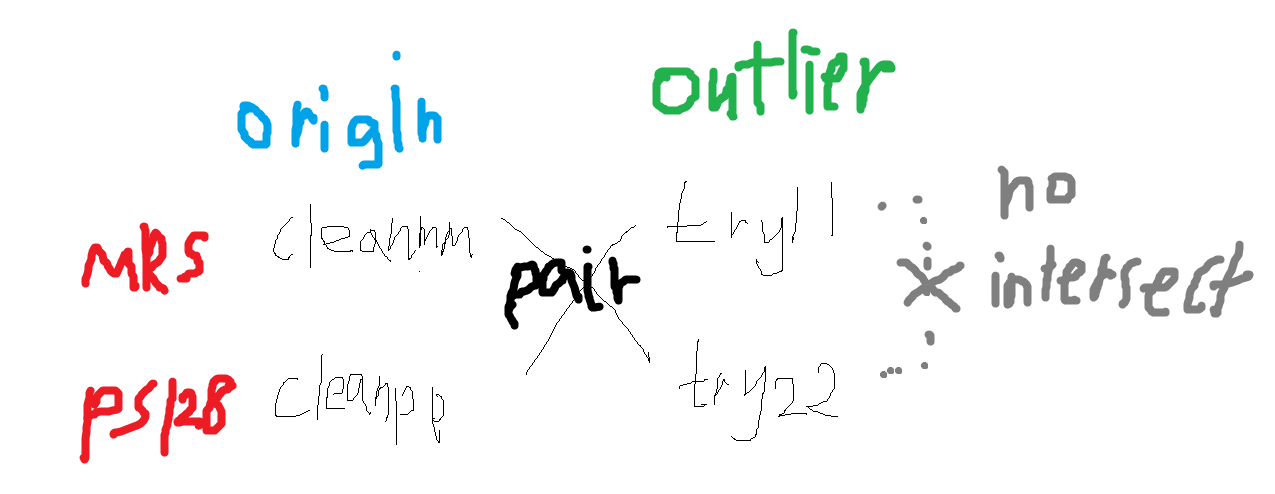

## 所以這裡直接把try11的outlier視為是MRS有,但ps128沒有的

## 並把try22視為是PS128產生,但MRS沒有的

### 找到try11跟try22他們各自pair的data; if not,則是為是全消耗OR新產生的物質

In [49]:
c= m2.index
cleanmm = m2.iloc[:,2:4].copy()  
cleanmm["mz"] = m2["mz"].round(1)
cleanmm["mrs_index"]= c

d= p2.index
cleanpp = p2.iloc[:,2:4].copy()
cleanpp["mz"] = p2["mz"].round(1)
cleanpp["ps_index"]= d

print("ok")

ok


## 採用模糊匹配的方式

In [50]:
dm = filtered["mrs_index"].tolist()
pm = filtered["ps_index"].tolist()

try111 = try11.drop(index= dm)
try222 = try22.drop(index= pm)
print("ok")

ok


In [51]:
#中間點檢查,一定要是TRUE才是正確
result = try111.index.isin(m2.index).all()
print(result)

True


In [54]:
merged = cleanmm.merge(try222, how='cross', suffixes=('_mrs', '_ps')) 

filtered2 = merged[
    (abs(merged["mz_mrs"] - merged["mz_ps"]) <= 0.5) &  # mz條件
    (abs(merged["rt_mrs"] - merged["rt_ps"]) <= 1)       # rt條件
]

filtered2.head()

,rt_mrs,mz_mrs,mrs_index,rt_ps,mz_ps,ps_index
592,6.2638,227.0,78,6.2615,227.0,101
785,7.2687,277.0,114,7.3197,277.0,165
850,7.5123,261.0,123,7.5618,261.0,184
932,9.7301,211.0,144,9.7703,211.0,219
1013,10.0016,245.0,157,9.9957,245.0,247


In [53]:
merged = try111.merge(cleanpp, how='cross', suffixes=('_mrs', '_ps128')) 

filtered1 = merged[
    (abs(merged["mz_mrs"] - merged["mz_ps128"]) <= 0.5) &  # mz條件
    (abs(merged["rt_mrs"] - merged["rt_ps128"]) <= 1)       # rt條件
]

filtered1.head()

,rt_mrs,mz_mrs,mrs_index,rt_ps128,mz_ps128,ps_index


# 存在於兩組中的東西

In [48]:
outmerge = pd.concat([filtered,filtered2], axis=0)
outmerge.head()

,rt_mrs,mz_mrs,mrs_index,rt_ps,mz_ps,ps_index
1643,20.5971,283.1,461,21.5942,283.1,339
1692,20.6614,371.1,840,21.4642,371.1,293
1773,22.4175,517.2,2247,23.3563,517.2,1999
12594,20.8211,750.2,572,21.7414,750.4,589
15427,20.8145,693.3,674,21.7999,693.4,605


In [49]:
outmer_M = outmerge["mrs_index"].unique().tolist()
outmer_p = outmerge["ps_index"].unique().tolist()

ommsns = m3.loc[outmer_M]
ompsns = p3.loc[outmer_p] #原本享用填上NA的filtered_p3,m3:但資料處理上真的太難了,所以維持使用fillna(-1)的data
print("ok")

ok


Batch original_index or 'max intensity' not found in one of the datasets. Skipping...


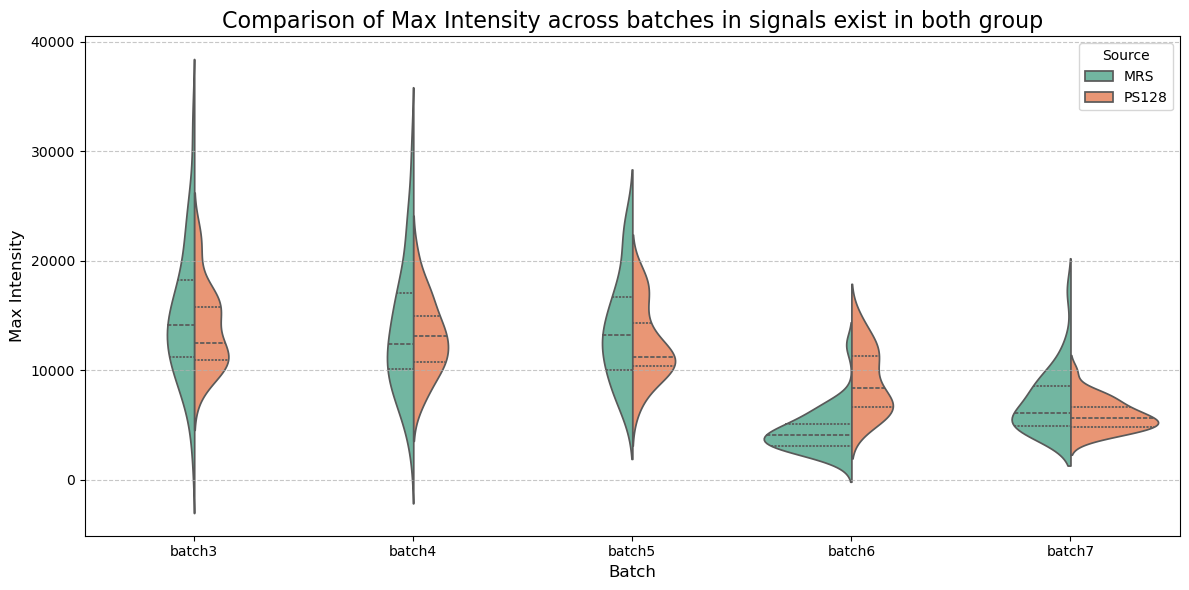

In [72]:
batches = ommsns.columns.get_level_values(0).unique()   # 獲取批次名稱（level=0）

all_data = []
for batch in batches:
    try:
        # 確認該批次是否包含 'max intensity'
        if (batch, 'max intensity') not in ommsns.columns or (batch, 'max intensity') not in ompsns.columns:
            print(f"Batch {batch} or 'max intensity' not found in one of the datasets. Skipping...")
            continue

        # 提取該批次的 'max intensity'
        df1_subset = ommsns[(batch, 'max intensity')].reset_index(drop=True)
        df2_subset = ompsns[(batch, 'max intensity')].reset_index(drop=True)

        # 加上標籤和批次名稱
        df1_subset = pd.DataFrame({'Value': df1_subset, 'Source': 'MRS', 'Batch': batch})
        df2_subset = pd.DataFrame({'Value': df2_subset, 'Source': 'PS128', 'Batch': batch})

        # 將兩部分數據加入到 all_data 列表
        all_data.append(df1_subset)
        all_data.append(df2_subset)

    except KeyError as e:
        print(f"KeyError encountered for Batch {batch}: {e}")

# 合併所有批次數據
all_data = pd.concat(all_data)

plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Batch",           
    y="Value",           
    hue="Source",        
    data=all_data,      
    split=True,          
    palette="Set2",      
    inner="quartile"    
)

plt.title("Comparison of Max Intensity across batches in signals exist in both group", fontsize=16)
plt.ylabel("Max Intensity", fontsize=12)
plt.xlabel("Batch", fontsize=12)
plt.legend(title="Source", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Batch original_index or 'max intensity' not found in one of the datasets. Skipping...


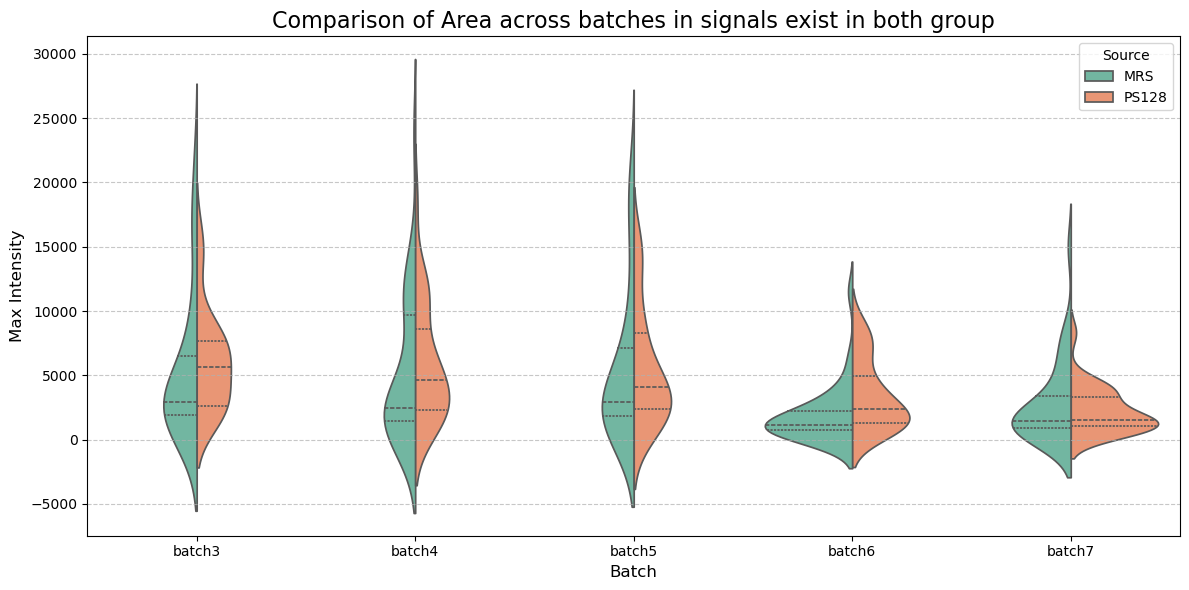

In [73]:
all_data = []
for batch in batches:
    try:
        # 確認該批次是否包含 'max intensity'
        if (batch, 'area') not in ommsns.columns or (batch, 'area') not in ompsns.columns:
            print(f"Batch {batch} or 'max intensity' not found in one of the datasets. Skipping...")
            continue

        # 提取該批次的 'max intensity'
        df1_subset = ommsns[(batch, 'area')].reset_index(drop=True)
        df2_subset = ompsns[(batch, 'area')].reset_index(drop=True)

        # 加上標籤和批次名稱
        df1_subset = pd.DataFrame({'Value': df1_subset, 'Source': 'MRS', 'Batch': batch})
        df2_subset = pd.DataFrame({'Value': df2_subset, 'Source': 'PS128', 'Batch': batch})

        # 將兩部分數據加入到 all_data 列表
        all_data.append(df1_subset)
        all_data.append(df2_subset)

    except KeyError as e:
        print(f"KeyError encountered for Batch {batch}: {e}")

# 合併所有批次數據
all_data = pd.concat(all_data)

plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Batch",           
    y="Value",           
    hue="Source",        
    data=all_data,      
    split=True,          
    palette="Set2",      
    inner="quartile"    
)

plt.title("Comparison of Area across batches in signals exist in both group", fontsize=16)
plt.ylabel("Max Intensity", fontsize=12)
plt.xlabel("Batch", fontsize=12)
plt.legend(title="Source", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
snscol = [2, 17, 20]
ommsns11 = df_mrs.loc[outmer_M]
ompsns11 = df_ps128.loc[outmer_p]

ommsns22 = ommsns11.iloc[:,snscol]
ommsns22["mz"] = ommsns22["mz"].round(1)
ommsns22["rt"] = ommsns22["rt"].round(1)

ompsns22 = ompsns11.iloc[:,snscol]
ompsns22["mz"] = ompsns22["mz"].round(1)
ompsns22["rt"] = ompsns22["rt"].round(1)
coct = pd.merge(ommsns22,ompsns22, on="mz")
coct.head()

C:\Temp\ipykernel_14732\63532969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ommsns22["mz"] = ommsns22["mz"].round(1)
C:\Temp\ipykernel_14732\63532969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ommsns22["rt"] = ommsns22["rt"].round(1)
C:\Temp\ipykernel_14732\63532969.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,rt_x,mz,height_x,rt_y,height_y
0,20.6,283.1,18900.0,21.6,14900.0
1,20.7,371.1,21180.0,21.5,13720.0
2,22.4,517.2,15230.0,23.4,12460.0
3,20.8,628.4,17730.0,21.1,14180.0
4,20.9,692.4,32240.0,21.5,22460.0


In [109]:
blankk,bkk=[],[]
for g in range(len(coct)):
    rt = (coct["rt_x"][g]+ coct["rt_y"][g])/2
    blankk.append(rt)
    height_ratio = coct["height_y"][g]/ coct["height_x"][g]
    bkk.append(height_ratio)
h = coct["mz"].to_frame(name="mz")
h["rt"]=blankk
h["height_ratio"]=bkk
h.head(3)

,mz,rt,height_ratio
0,283.1,21.1,0.788360
1,371.1,21.1,0.647781
2,517.2,22.9,0.818122


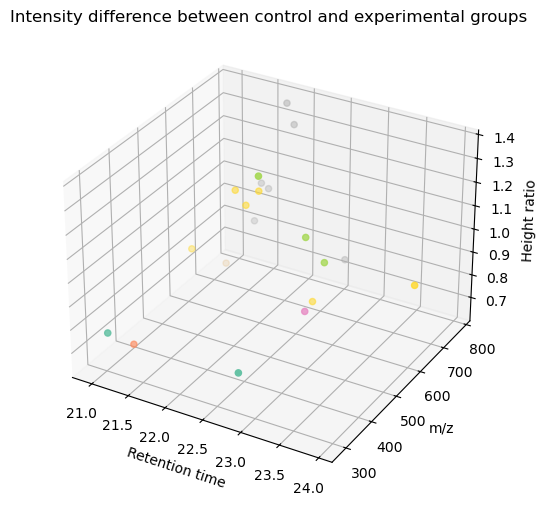

In [125]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(projection='3d')
x = h["rt"]
y = h["mz"]
z = h["height_ratio"]

ax.scatter(x, y, z, c=y, cmap="Set2")  # 设置颜色映射

# 添加标签和标题
ax.set_xlabel("Retention time")
ax.set_ylabel("m/z")
ax.set_zlabel("Height ratio")
ax.set_title("Intensity difference between control and experimental groups")
#plt.tight_layout()
#plt.subplots_adjust(right=0.85, top=0.95)

plt.show()

# try111都只存於mrs

In [51]:
it = m2.index.tolist()
dh = df_mrs.loc[it]
a= dh["height"]
print(type(dh["height"]))

<class 'pandas.core.series.Series'>


In [58]:
onlyinM = try111["mrs_index"].tolist()
b=a.loc[onlyinM]
dfinM= m2.loc[onlyinM,:]
dfinM["height"] = b
c = dfinM["mz"].round(1)
dfinM["mz"] = c
print("ok")

ok


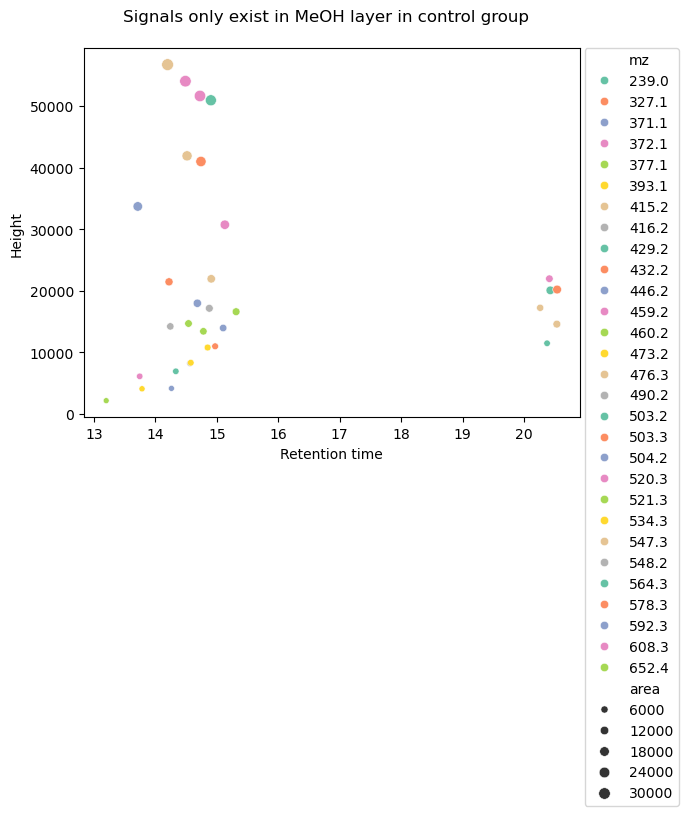

In [62]:
sns.scatterplot(
    x="rt", 
    y="height", 
    hue="mz",
    size="area", 
    palette="Set2", 
    data= dfinM
)

plt.plot(color="gray", 
         alpha = 0.5,
         linestyle="--", 
         linewidth=2)
plt.xlabel("Retention time")
plt.ylabel("Height")
plt.title("Signals only exist in MeOH layer in control group")
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)
plt.show()

In [59]:
j = filtered["ps_index"].tolist()
k = filtered2["ps_index"].tolist()
l = j+k
n = try22.drop(index=l)
onlyinPlist=n["ps_index"].tolist()
colsave =[1,2,17,20]
o = df_ps128.iloc[:,colsave]
p = o.loc[onlyinPlist]
p["mz"] = p["mz"].round(1)
p.head()

,area,rt,mz,height
208,50410.0,8.5687,211.0,84880.0
262,5124.0,10.7273,520.2,4286.0
326,3456.0,13.5446,520.2,4089.0
328,3074.0,13.4648,415.1,4847.0
387,4416.0,16.2994,415.1,5446.0


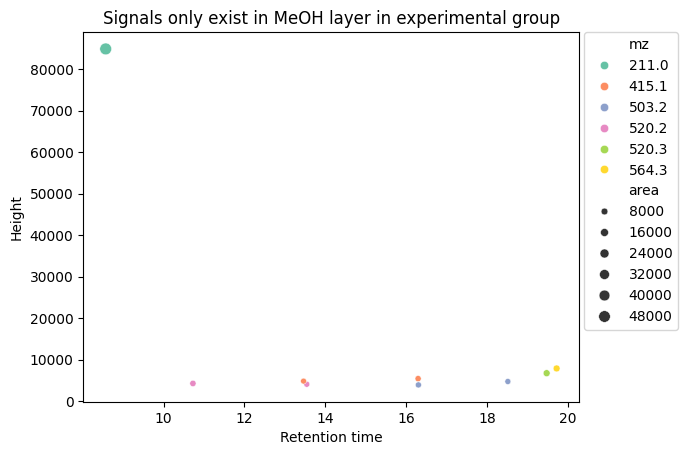

In [60]:
sns.scatterplot(
    x="rt", 
    y="height", 
    hue="mz",
    size="area", 
    palette="Set2", 
    data= p
)

plt.plot(color="gray", 
         alpha = 0.5,
         linestyle="--", 
         linewidth=2)
plt.xlabel("Retention time")
plt.ylabel("Height")
plt.title("Signals only exist in MeOH layer in experimental group")
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)
plt.show()

In [5]:
diff_mrs = pd.merge(
    df_round_mrs1,
    df_round_tween1,
    on=["rounded_mz", "rounded_rt"],
    how="left",
    indicator=True
)
diff_mrs = diff_mrs[diff_mrs["_merge"] == "left_only"].drop(columns=["_merge"])

diff_ps128 = pd.merge(
    df_round_ps1281,
    df_round_tween1,
    on=["rounded_mz", "rounded_rt"],
    how="left",
    indicator=True
)
diff_ps128 = diff_ps128[diff_ps128["_merge"] == "left_only"].drop(columns=["_merge"])
diff_ps128.tail(3)

,rounded_mz,rounded_rt,original index_x,original index_y
571,285,35,748,NaN
572,581,35,749,NaN
573,684,36,750,NaN


In [6]:
index_mrs = diff_mrs["original index_x"]
index_ps128 = diff_ps128["original index_x"]

for idx_mrs in index_mrs: 
    df_mrs_res = df_mrs.loc[index_mrs].copy()
for idx_ps128 in index_ps128: 
    df_ps128_res = df_ps128.loc[index_ps128].copy()

df_ps128_res.tail(5)

,id,area,rt,mz_range:min,mz_range:max,charge,fragment_scans,alignment_scores:rate,alignment_scores:aligned_features_n,alignment_scores:align_extra_features,...,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:rt_range:max,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:feature_state,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:mz,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:intensity_range:min,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:intensity_range:max,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:asymmetry_factor,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:tailing_factor,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:height,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:charge,datafile:241213_PS1284_BuOH_250up_pos_13_01_220.mzML:isotopes
746,757,38480.0,35.2195,341.21275,341.26130,1.0,0,1.000,3,0,...,35.7267,DETECTED,341.23501,4373.0,51580.0,1.2262,1.1995,51580.0,1.0,2.0
747,758,6820.0,35.2357,381.21780,381.26695,NaN,0,1.000,3,0,...,35.3807,DETECTED,381.24476,4467.0,11150.0,0.5996,0.7998,11150.0,NaN,NaN
748,759,3996.0,35.2443,285.14464,285.20924,NaN,0,0.667,2,0,...,35.3555,ESTIMATED,285.17986,5024.0,8503.0,0.4965,0.7482,8503.0,NaN,NaN
749,760,20570.0,35.2337,580.49385,580.59783,NaN,0,0.333,1,0,...,35.5040,ESTIMATED,580.53023,5830.0,10130.0,0.8543,0.9272,10130.0,NaN,NaN
750,761,14580.0,35.9775,684.19973,684.30432,NaN,0,0.333,1,0,...,36.2713,ESTIMATED,684.24846,5090.0,10910.0,1.0958,1.0479,10910.0,NaN,NaN


In [ ]:
sns.scatterplot(
    x="intensity_control", 
    y="intensity_experiment", 
    hue="mz", 
    palette="Set2", 
    data= below_600
)

ax = plt.gca()
ax.set_xlim([7500, 20000])
ax.set_ylim([7500, 20000])

plt.plot([0, merged_data["intensity_control"].max()], 
         [0, merged_data["intensity_control"].max()], 
         color="gray", 
         alpha = 0.5,
         linestyle="--", 
         linewidth=2)
plt.xlabel("Control group intensity")
plt.ylabel("Experimental group intensity")
plt.title("Intensity difference between control and experimental groups", y=+1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()